In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [2]:
data=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.shape

(962, 2)

In [5]:
data["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [6]:
len(data["Category"].value_counts())

25

# As We have the category, then we need to do three visulation presentation of the category
1. Countplot of the category
2.piechart to show the distribution of the Category
3.WordCloud for see the most numbers of words larger and vice versa

In [7]:
# Visulization of the category

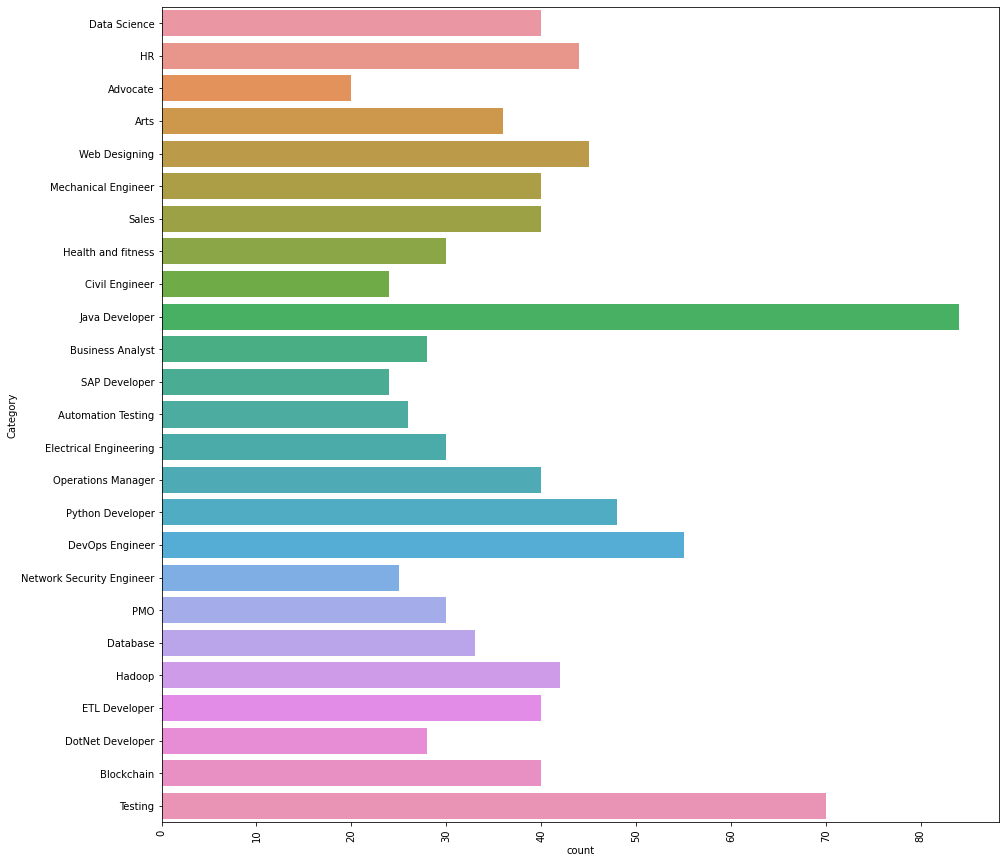

In [8]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [9]:
# lets check the distribution of the each category 

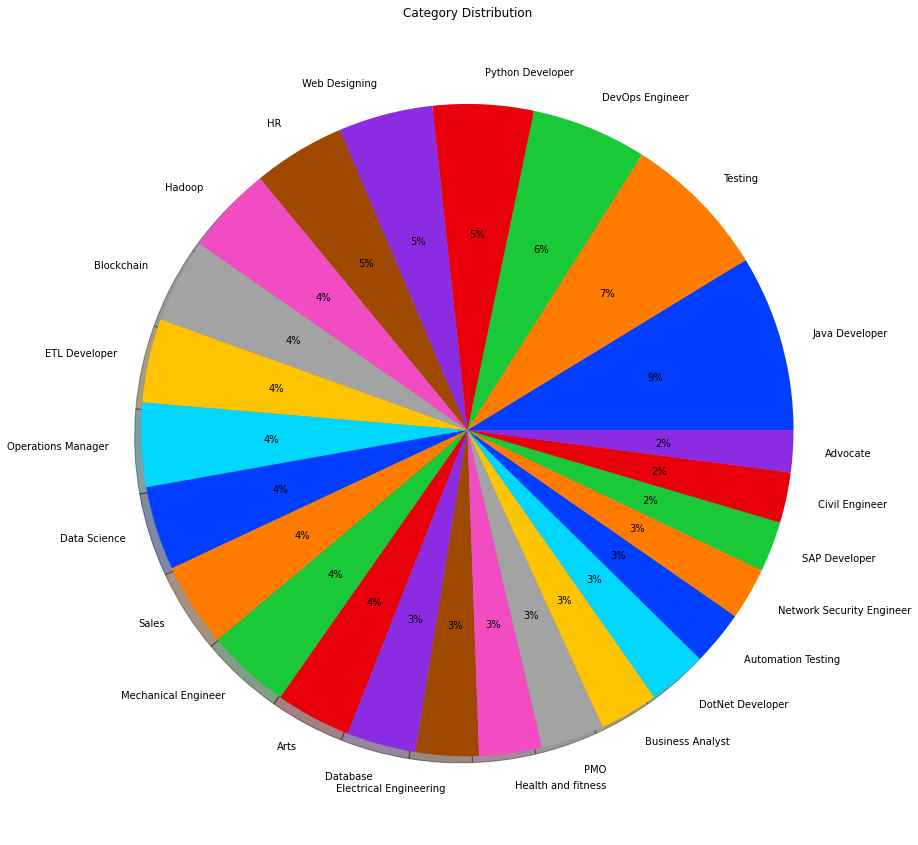

In [10]:
plt.figure(figsize=(15,15))
value=data["Category"].value_counts().values
keys=data["Category"].value_counts().index
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.title("Category Distribution")
plt.pie(value, labels=keys, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.show()

In [11]:
x=data["Resume"]
x.head()

0    Skills * Programming Languages: Python (pandas...
1    Education Details \r\nMay 2013 to May 2017 B.E...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Education Details \r\n MCA   YMCAUST,  Faridab...
Name: Resume, dtype: object

In [12]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
#for avoid the stopwords we need to do this 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops=stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
#import PorterStemmer for the stemming purpose
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
def preprocessing(x):
    x=re.sub("[^a-zA-Z0-9]"," ",x)
    x=x.lower()
    x=x.split()
    x=[lemmatizer.lemmatize(word) for word in x if word not in stops]
    x=" ".join(x)
    return x

In [17]:
preprocessing("this is my SElf Gajender@983 *l2* #92")

'self gajender 983 l2 92'

In [18]:
# for i in range(len(data["Resume"])):
#   text=re.sub("[^a-zA-Z0-9]"," ",data["Resume"][i])
#   text=text.lower()
#   text=[ps.stem(word) for word in text if word not in stops]
#   print(text)

In [19]:
data["Resume"]=data["Resume"].apply(preprocessing)

In [20]:
data.head()

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [21]:
##Now as we have cleared the dataset, the next task is to have a look at the Wordcloud.
# A Wordcloud represents the most numbers of words larger and vice versa:

In [22]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


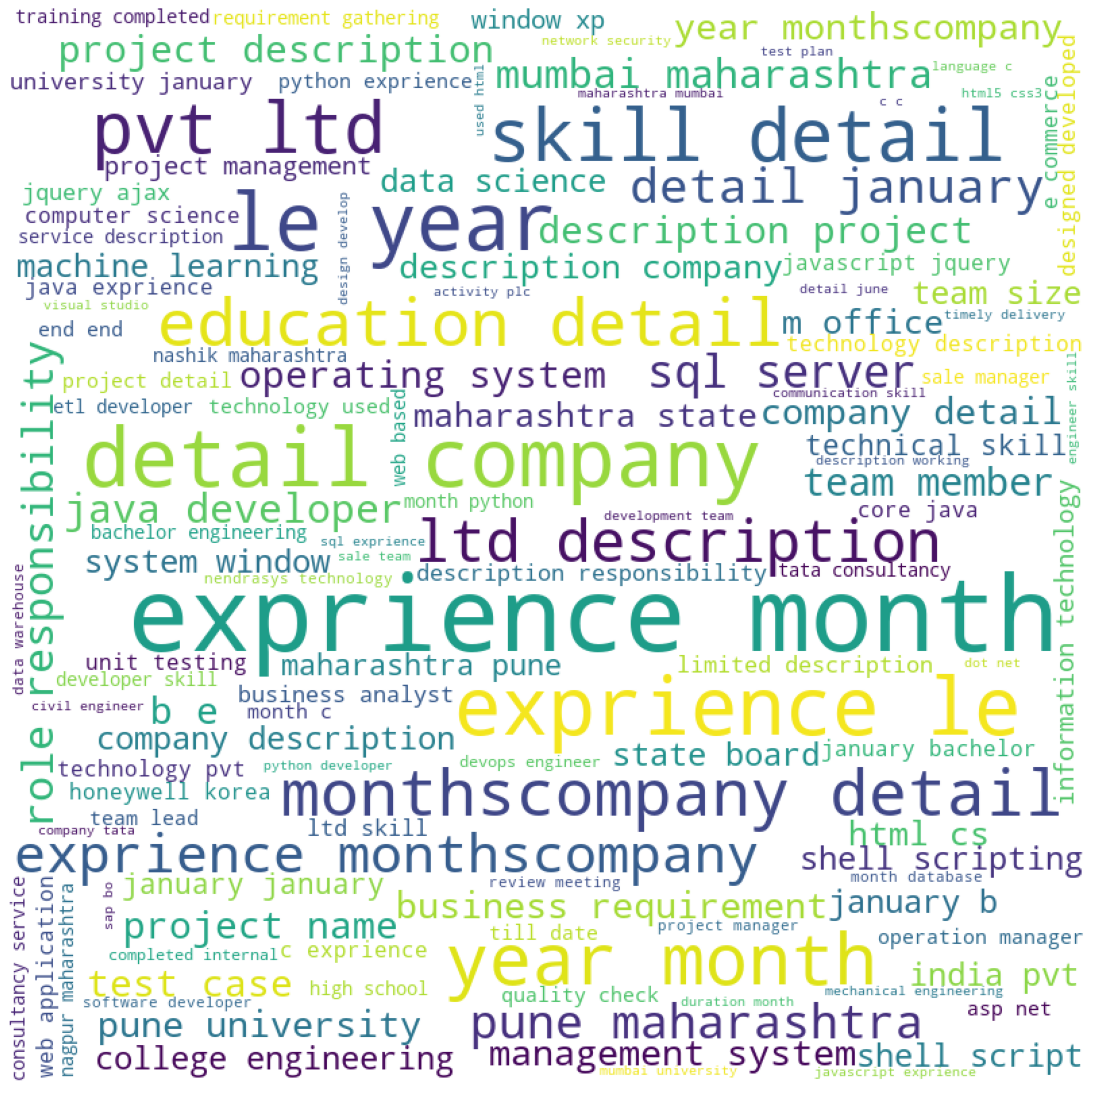

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Creating the text variable
text = " ".join(cat for cat in data["Resume"])

word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image                      
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Now Need to convert these into the category

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
data.head(1)

,Category,Resume
0,Data Science,skill programming language python panda numpy ...


In [31]:
l=LabelEncoder()
y=l.fit_transform(data["Category"])
y=pd.DataFrame(y)
y.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
6     40
18    40
22    40
3     40
10    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
dtype: int64

In [32]:
x=data["Resume"]
x

0      skill programming language python panda numpy ...
1      education detail may 2013 may 2017 b e uit rgp...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness accept challenge positive thinking...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge m power poin...
961    skill set o window xp 7 8 8 1 10 database mysq...
Name: Resume, Length: 962, dtype: object

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# now give the text data to tfidfvectorizer to covert the text into the vectors

In [35]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(x)

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)

In [36]:
WordFeatures = word_vectorizer.transform(x)

In [42]:
## here 1500 features has been created as we give the 1500 input in our tfidfvectorizer
WordFeatures.shape

(962, 1500)

In [41]:
print(WordFeatures)

  (0, 1498)	0.025825655656780196
  (0, 1484)	0.031595210870931555
  (0, 1482)	0.1278231162602753
  (0, 1463)	0.11727809264989551
  (0, 1459)	0.06489939538588455
  (0, 1450)	0.07206145797706967
  (0, 1449)	0.030476453810942827
  (0, 1441)	0.02931233936959277
  (0, 1440)	0.06884845251241699
  (0, 1439)	0.03733464023084576
  (0, 1436)	0.05197382751997319
  (0, 1425)	0.04263496520705632
  (0, 1424)	0.04610706302514284
  (0, 1393)	0.18421912159255271
  (0, 1392)	0.08963198157710796
  (0, 1387)	0.055546497981909713
  (0, 1381)	0.13614593969187913
  (0, 1375)	0.056511376416265253
  (0, 1367)	0.06843896409034551
  (0, 1365)	0.05084789188137316
  (0, 1362)	0.022958295659070194
  (0, 1349)	0.13720540077633894
  (0, 1343)	0.14044024022503643
  (0, 1313)	0.04946993830160514
  (0, 1302)	0.03845197255081132
  :	:
  (961, 370)	0.11479037740238915
  (961, 355)	0.1333191482674171
  (961, 333)	0.06640668559442404
  (961, 331)	0.08572024352593975
  (961, 290)	0.0252659604971587
  (961, 276)	0.08166714796

In [44]:
x1=np.array(WordFeatures)
x1

array(<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 112968 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [45]:
print(x1)

  (0, 1498)	0.025825655656780196
  (0, 1484)	0.031595210870931555
  (0, 1482)	0.1278231162602753
  (0, 1463)	0.11727809264989551
  (0, 1459)	0.06489939538588455
  (0, 1450)	0.07206145797706967
  (0, 1449)	0.030476453810942827
  (0, 1441)	0.02931233936959277
  (0, 1440)	0.06884845251241699
  (0, 1439)	0.03733464023084576
  (0, 1436)	0.05197382751997319
  (0, 1425)	0.04263496520705632
  (0, 1424)	0.04610706302514284
  (0, 1393)	0.18421912159255271
  (0, 1392)	0.08963198157710796
  (0, 1387)	0.055546497981909713
  (0, 1381)	0.13614593969187913
  (0, 1375)	0.056511376416265253
  (0, 1367)	0.06843896409034551
  (0, 1365)	0.05084789188137316
  (0, 1362)	0.022958295659070194
  (0, 1349)	0.13720540077633894
  (0, 1343)	0.14044024022503643
  (0, 1313)	0.04946993830160514
  (0, 1302)	0.03845197255081132
  :	:
  (961, 370)	0.11479037740238915
  (961, 355)	0.1333191482674171
  (961, 333)	0.06640668559442404
  (961, 331)	0.08572024352593975
  (961, 290)	0.0252659604971587
  (961, 276)	0.08166714796

In [46]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures,y,random_state=0, test_size=0.3)

In [47]:
x_train.shape

(673, 1500)

In [48]:
x_test.shape

(289, 1500)

In [49]:
y_train.shape

(673, 1)

In [50]:
y_test.shape

(289, 1)

In [51]:
##now train the machine learning model

In [52]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred=model.predict(x_test)

In [54]:
y_pred

array([20, 14,  6, 17, 15, 14, 10, 14, 15, 11,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3, 19, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 11,  9, 23, 11, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22,  6, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 11, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 11, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15,  8, 16, 15,  5, 12, 12, 17, 16, 24, 10, 19,
       16,  5, 23,  5,  5,  6, 19,  4, 16, 17,  0,  4, 12,  4, 18, 20,  3,
       18, 17,  6, 11, 21

In [55]:
model.score(x_train,y_train)

0.9955423476968797

In [56]:
model.score(x_test,y_test)

0.9896193771626297

In [59]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00         9
          17       1.00    